# MVD 7. cvičení

## 1. část - Vytvoření dat

V dnešním cvičení je před implementací shlukování potřeba vygenerovat vlastní data. Cílem je vytvořit několik datasetů dle předlohy a vizualizovat je. Postačí dosažení podobného pozice a rozložení bodů.

In [2]:
import sys
!{sys.executable} -m pip install sklearn

In [3]:
import random
import sklearn as sk
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

### 1. dataset - 2 třídy, 100 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset1.png)

Připravený dataset pro další úlohu (k-means) může vypadat například takto:
![prepared](expected_outputs/prepared_dataset.png)

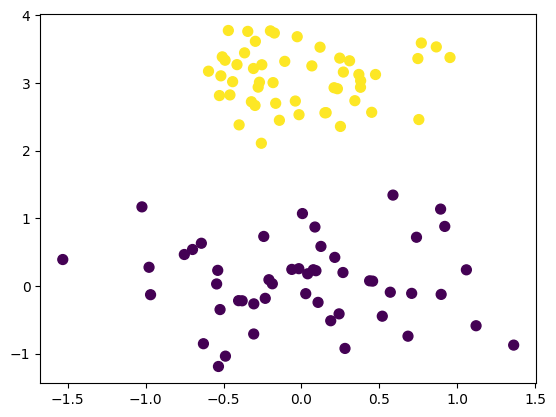

In [4]:
centers = [(0,0),(0,3)]
X1, y1 = sklearn.datasets.make_blobs(
    n_samples=100, 
    centers=centers, 
    n_features=2, 
    cluster_std=[0.6,0.4], 
    random_state=0
)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='viridis')
plt.show()

### 2. dataset - 4 třídy, 200 datových bodů
Použijte funkci ```make_blobs``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

![dataset1](expected_outputs/dataset2.png)

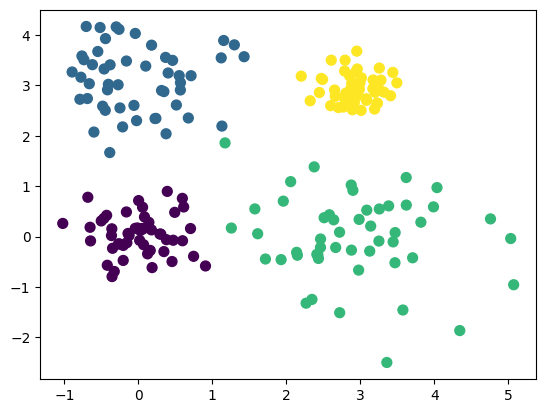

In [5]:
samples = 200
centers = [(0,0),(0,3),(3,0),(3,3)]
stds = [0.4,0.6,0.9,0.3]
X2, y2 = sklearn.datasets.make_blobs(
    n_samples=samples, centers=centers, cluster_std=stds, 
    n_features=2, random_state=0
)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='viridis')
plt.show()

### 3. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_moons``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons).

![dataset1](expected_outputs/dataset3.png)

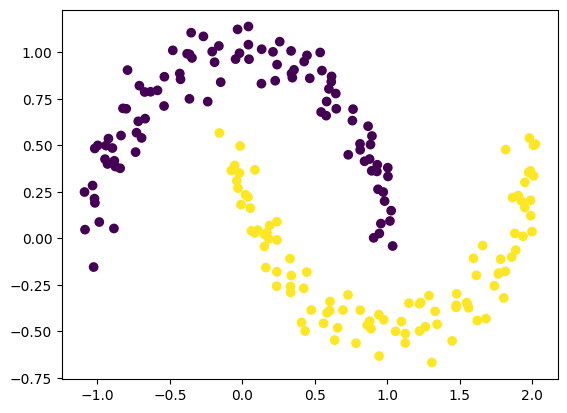

In [6]:
X3, y3 = sklearn.datasets.make_moons(
    n_samples=200, noise=[0.06, 0.087], random_state=0)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis')
plt.show()

### 4. dataset - 2 třídy, 200 datových bodů
Použijte funkci ```make_circles``` [odkaz na dokumentaci](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles).

![dataset1](expected_outputs/dataset4.png)

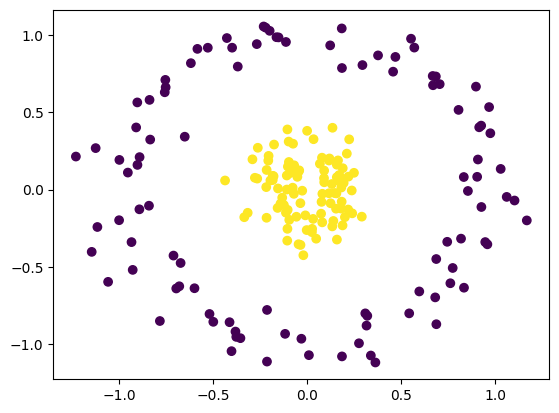

In [7]:
X4, y4 = sklearn.datasets.make_circles(
    n_samples=200, noise=0.1,
    random_state=0, factor=0.2)
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='viridis')
plt.show()

## 2. část - K-means

Implementujte K-means algoritmus, aplikujte ho na všechny 4 datasety a zobrazte výsledky algoritmu. Zároveň se pokuste zvýraznit centroid ve vizualizaci výsledku. Pro aplikaci K-means můžete použít počet tříd v každém datasetu (není třeba hledat parametr K automaticky).

In [8]:
def euclidean_dist(v1, v2):
    return np.sqrt(np.sum((v2-v1)**2, axis=0))

def manhattan_dist(v1, v2):
    return np.sum(abs(v2-v1), axis=0)

class KMeans:
    def __init__(self, data, k, metric=manhattan_dist):
        self.metric = metric
        self.data = data
        self.k = k

    def generate_centroids(self):
        return np.array(random.choices(self.data, k = self.k))

    def index_of_nearest_centroid_from(self, point):
        distances = np.zeros(self.centroids.shape[0])
        for index, centroid in enumerate(self.centroids):
            distances[index] = self.metric(point, centroid)
            #print(distances)
        return np.argmin(distances)

    def criterion(self, last):
        print("Criterion: ", np.sum(abs(self.metric(self.centroids, last))))
        return np.sum(abs(self.metric(self.centroids, last)))

    def make_clusters(self):
        self.centroids = self.generate_centroids()
        self.clusters = np.zeros(self.data.shape[0])

        last = self.centroids**2
        while self.criterion(last) > 0.1:
            # cluster data
            for index, point in enumerate(self.data):
                self.clusters[index] = self.index_of_nearest_centroid_from(point)

            # update centroids
            last = self.centroids.copy()
            for index, centroid in enumerate(self.centroids):
                indexes = np.argwhere(self.clusters==index)
                points = self.data[indexes,:].squeeze()
                #print(points.shape)
                #print(points)
                self.centroids[index] = np.mean(points, axis=0)
        return self.clusters


(100, 2)
Criterion:  7.432331392678938
Criterion:  1.7541249597690456
Criterion:  0.0


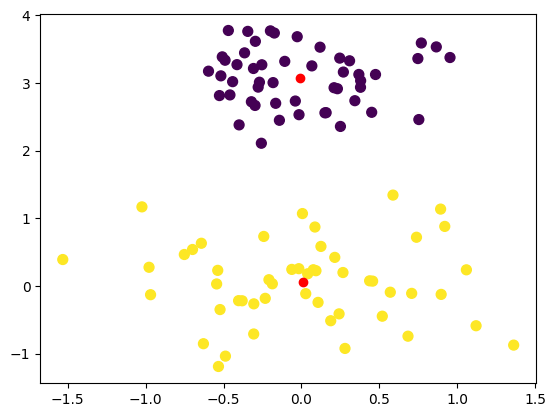

In [12]:
#X4, y4
data = X1
print(data.shape)
kmean = KMeans(data, 2)
clusters = kmean.make_clusters()
centroids = kmean.centroids
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')

plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.show()

(200, 2)
Criterion:  27.233541688987458
Criterion:  3.882022737082756
Criterion:  2.015641369211287
Criterion:  0.6928031463539024
Criterion:  0.07520806444196813


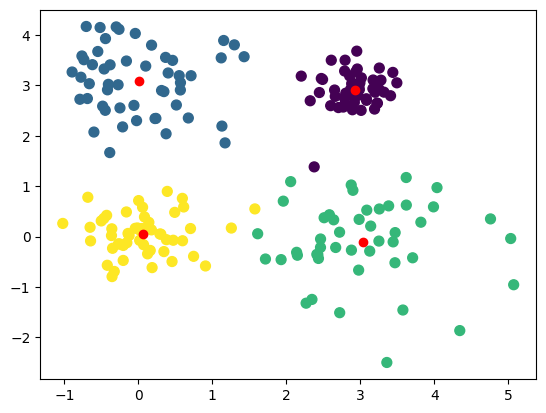

In [13]:
#X4, y4
data = X2
print(data.shape)
kmean = KMeans(data, 4)
clusters = kmean.make_clusters()
centroids = kmean.centroids
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')

plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.show()

(200, 2)
Criterion:  2.0617355278420715
Criterion:  1.029500485660035
Criterion:  0.10295271127175257
Criterion:  0.10473045329864168
Criterion:  0.06276538957079465


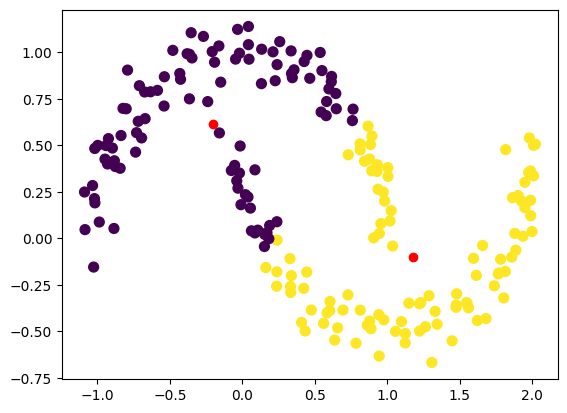

In [14]:
#X4, y4
data = X3
print(data.shape)
kmean = KMeans(data, 2)
clusters = kmean.make_clusters()
centroids = kmean.centroids
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')

plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.show()

(200, 2)
Criterion:  2.852235284031015
Criterion:  0.5551861165278631
Criterion:  0.1691729053296584
Criterion:  0.07191862971108924


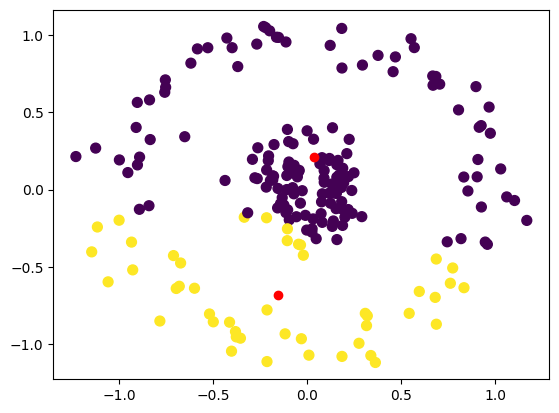

In [15]:
#X4, y4
data = X4
print(data.shape)
kmean = KMeans(data, 2)
clusters = kmean.make_clusters()
centroids = kmean.centroids
plt.scatter(data[:, 0], data[:, 1], c=clusters, s=50, cmap='viridis')

plt.plot(centroids[:,0], centroids[:,1], 'ro')
plt.show()

## Bonus - K-means s nalezenou hodnotou K

Zkuste najít algoritmy, které umožňují hledat hodnotu K pro K-means. Implementujte alespoň jeden z nich a ověřte, že funguje. Ověření proveďte nejen na našich předchozích datasetech, ale zkuste si vygenerovat i dataset s větším množstvím tříd (10-20). (1 bod)

Za implementaci více algoritmů, případně za hlubší analýzu výsledků (např. kdy už přestává hledání hodnoty K správně fungovat) je možné získat ještě jeden bonusový bod.

#### Algoritmus pro nalezení čísla K:
- [LBG](../../poznamky/LBG.md)
- Elbow Method
- Silhouette Method

#### Zdroje:
- [how-to-determine-the-optimal-k-for-k-means](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb)

In [9]:
from KMeans import *

In [61]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

def find_k_with_WSS(x, kmax):
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    sse = calculate_WSS(x, kmax)

    # plot points in subplots in one color
    plt.subplot(1, 2, 1)
    plt.title("Points in clusters")
    plt.xlabel("x(1)")
    plt.ylabel("x(2)")
    plt.scatter(x[:, 0], x[:, 1], c='black', s=7)

    # plot the graph of silhoutte
    plt.subplot(1, 2, 2)
    plt.title("Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("WSS")
    plt.plot(range(2, kmax+1), sse[1:])
    plt.xticks(range(2, kmax+1))
    
    # print graphs
    plt.gcf().set_size_inches(10, 4)
    plt.show()

In [62]:
def silhouette_score(data, clusters, metric: str = 'euclidean'):
    """ Silhouette score
    a: mean distance to other points in the same cluster
    b: mean distance to other points in the nearest cluster
    s: (b-a)/max(a,b)
    """
    dist = euclidean_dist
    if metric == 'euclidean':
        dist = euclidean_dist
    elif metric == 'manhattan':
        dist = manhattan_dist

    a = np.zeros(data.shape[0])
    b = np.zeros(data.shape[0])
    s = np.zeros(data.shape[0])
    for index, point in enumerate(data):
        # a(i) is the measure of similarity of the point i to its own cluster. 
        # It is measured as the average distance of i from other points in the cluster.
        indexes = np.argwhere(clusters==clusters[index])
        points = data[indexes,:].squeeze()
        a[index] = np.mean(dist(point, points))
        #print(a[index])

        # nearest cluster index
        nearest_cluster = 0
        min_dist = np.inf
        for cluster in np.unique(clusters):
            if cluster != clusters[index]:
                indexes = np.argwhere(clusters==cluster)
                points = data[indexes,:].squeeze()
                new_distance = np.mean(dist(point, points)) 
                if new_distance < min_dist:
                    min_dist = new_distance
                    nearest_cluster = cluster

        # b(i) is the measure of dissimilarity of i from points in closest clusters.
        indexes = np.argwhere(clusters==nearest_cluster)
        points = data[indexes,:].squeeze()
        b[index] = np.mean(dist(point, points))
        #print(b[index])

        # s(i) is the silhouette of i, which is defined as (b(i) - a(i)) / max(a(i), b(i)).
        s[index] = (b[index]-a[index])/max(a[index], b[index])
    return np.mean(s)

In [63]:
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

def find_k_with_siluettes(x, kmax):
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(x)
        labels = kmeans.labels_
        sil.append(silhouette_score(x, labels, metric = 'euclidean'))

    # plot points in subplots in one color
    plt.subplot(1, 2, 1)
    plt.title("Points in clusters")
    plt.xlabel("x(1)")
    plt.ylabel("x(2)")
    plt.scatter(x[:, 0], x[:, 1], c='black', s=7)

    # plot the graph of silhoutte
    plt.subplot(1, 2, 2)
    plt.title("Silhouette score for different number of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score (higher is better)")
    plt.plot(range(2, kmax+1), sil)
    plt.xticks(range(2, kmax+1))
    
    # print graphs
    plt.gcf().set_size_inches(10, 4)
    plt.show()
    

### Porovnání metod na ruzných datech:

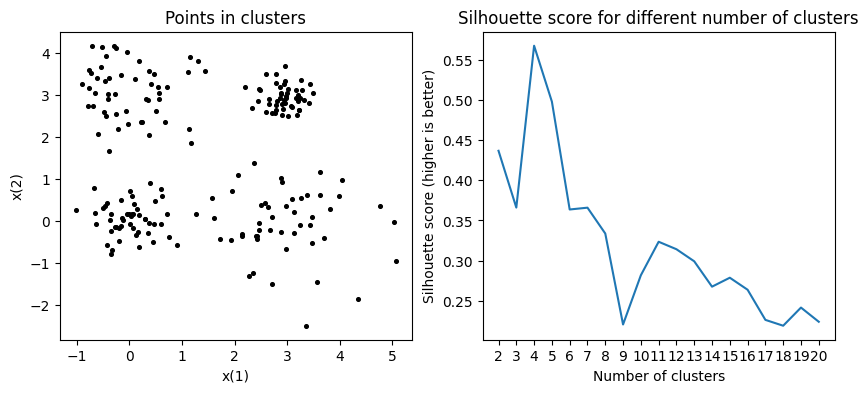

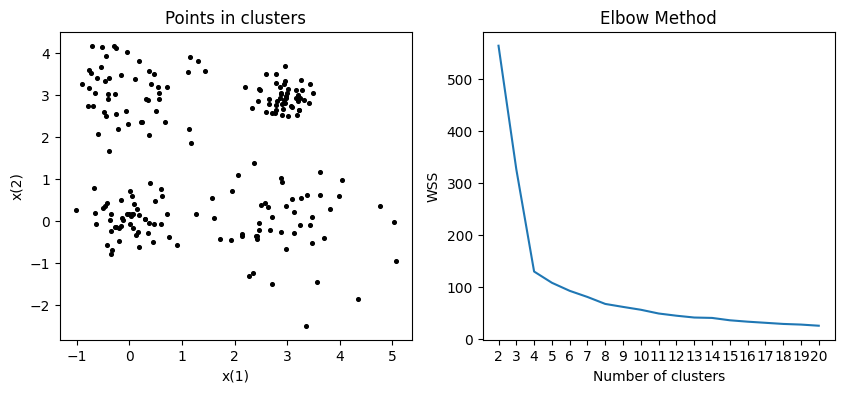

In [65]:
x = X2
kmax = 20

find_k_with_siluettes(x, kmax)
find_k_with_WSS(x, kmax)

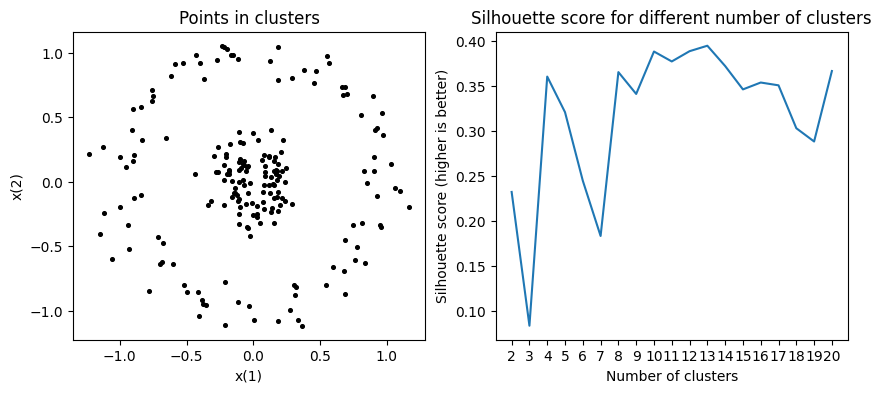

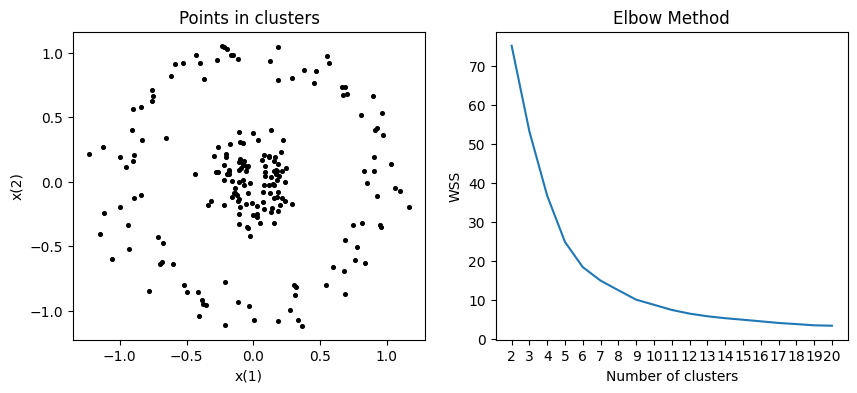

In [66]:
x = X4
kmax = 20
find_k_with_siluettes(x, kmax)
find_k_with_WSS(x, kmax)

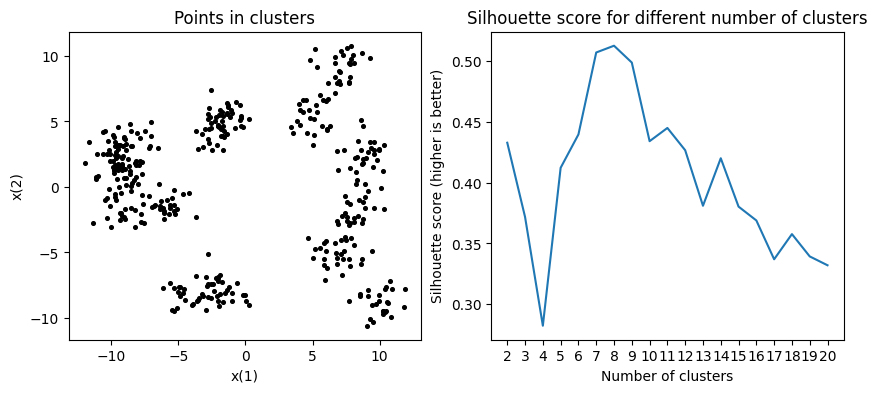

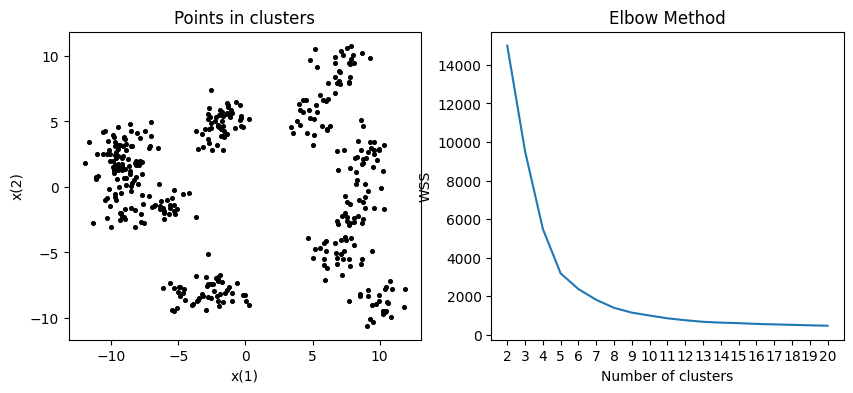

In [67]:
x, y = sklearn.datasets.make_blobs(n_samples=400, centers=15, n_features=2)
kmax = 20
find_k_with_siluettes(x, kmax)
find_k_with_WSS(x, kmax)